In [1]:
import numpy as np
import pandas as pd

ls = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))
ls[0]

import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

path = "../input/indian-monuments-image-dataset/Indian-monuments/images"
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Num GPUs Available:  1
There are 2 directories and 0 images in '../input/indian-monuments-image-dataset/Indian-monuments/images'.
There are 24 directories and 0 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test'.
There are 0 directories and 45 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/India_gate'.
There are 0 directories and 62 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/tajmahal'.
There are 0 directories and 100 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/iron_pillar'.
There are 0 directories and 34 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/Ellora Caves'.
There are 0 directories and 40 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/Sun Temple Konark'.
There are 0 directories and 42 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/Fatehpur Sikri'.


In [3]:

train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'../input/indian-monuments-image-dataset/Indian-monuments/images/train/'

In [4]:

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [5]:

def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    

    random_image = random.sample(os.listdir(target_folder), 1)


    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Image shape: (825, 1100, 3)


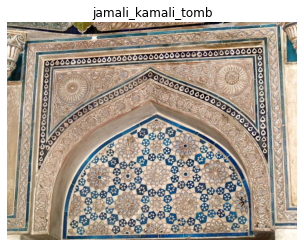

In [6]:

import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [8]:

model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

In [9]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=50,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
115/115 [==============================] - 86s 686ms/step - loss: 2.5855 - accuracy: 0.2864 - val_loss: 3.0841 - val_accuracy: 0.3174
Epoch 2/50
115/115 [==============================] - 63s 549ms/step - loss: 0.7423 - accuracy: 0.8189 - val_loss: 3.7267 - val_accuracy: 0.3947
Epoch 3/50
115/115 [==============================] - 63s 551ms/step - loss: 0.1523 - accuracy: 0.9738 - val_loss: 5.0214 - val_accuracy: 0.4204
Epoch 4/50
115/115 [==============================] - 63s 544ms/step - loss: 0.0483 - accuracy: 0.9935 - val_loss: 5.7162 - val_accuracy: 0.4118
Epoch 5/50
115/115 [==============================] - 62s 542ms/step - loss: 0.0252 - accuracy: 0.9986 - val_loss: 6.0495 - val_accuracy: 0.4185
Epoch 6/50
115/115 [==============================] - 61s 535ms/step - loss: 0.0144 - accuracy: 0.9989 - val_loss: 5.7167 - val_accuracy: 0.4156
Epoch 7/50
115/115 [==============================] - 62s 543ms/step - loss: 0.0240 - accuracy: 0.9992 - val_loss: 6.5782 - val_ac

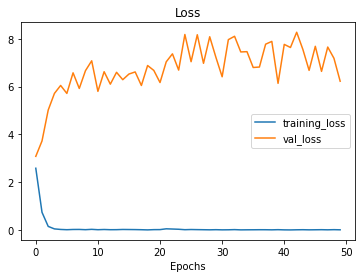

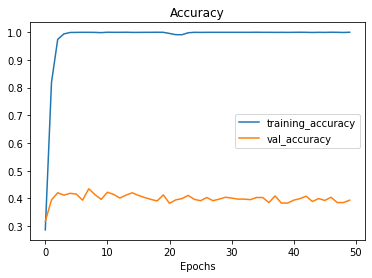

In [10]:
plot_loss_curves(history_10)

In [11]:

def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
    
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

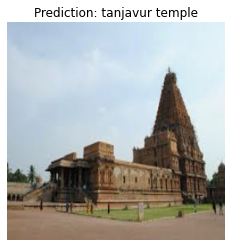

In [12]:

pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/tanjavur temple/20.jpeg", class_names)

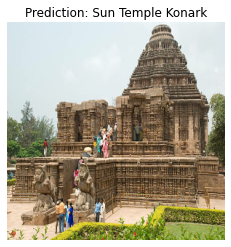

In [13]:
pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/Sun Temple Konark/14.jpg", class_names)

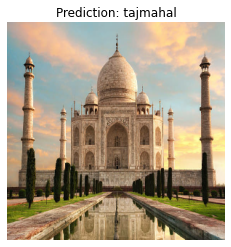

In [14]:
pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/tajmahal/92.jpg", class_names)

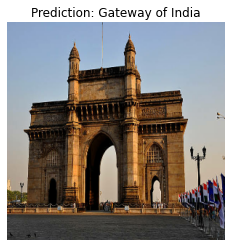

In [15]:
pred_and_plot(model_10, "/kaggle/input/indian-monuments-image-dataset/Indian-monuments/images/test/Gateway of India/150.jpg", class_names)

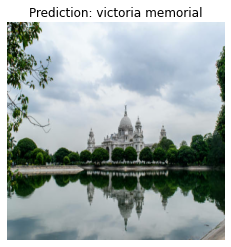

In [16]:
pred_and_plot(model_10,"/kaggle/input/indian-monuments-image-dataset/Indian-monuments/images/test/victoria memorial/198.jpg", class_names)

In [17]:

model_10.save("saved_trained_model")

In [18]:
model_10.save('my_combined_model.h5')

Model saved as a zip: /kaggle/working/saved_trained_model.zip


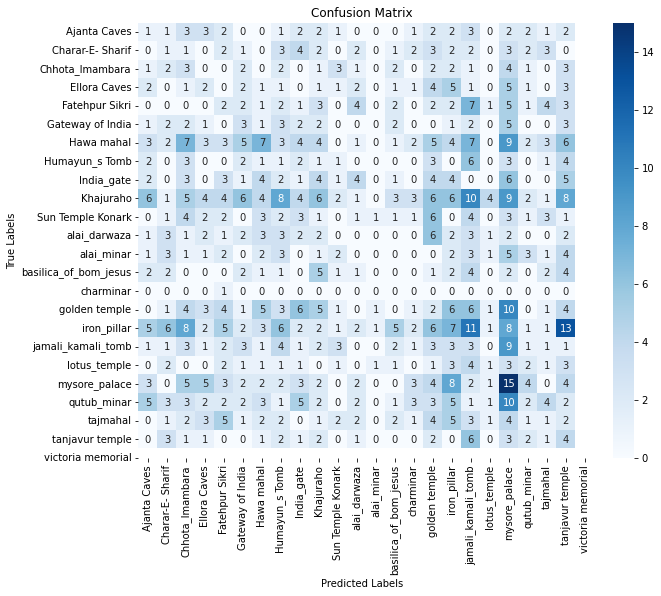

In [19]:
import zipfile
import os

directory = "/kaggle/working/saved_trained_model"


zip_file_name = "/kaggle/working/saved_trained_model.zip"


with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(directory):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory))


print("Model saved as a zip:", zip_file_name)


predictions = model_10.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

class_labels = list(test_data.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


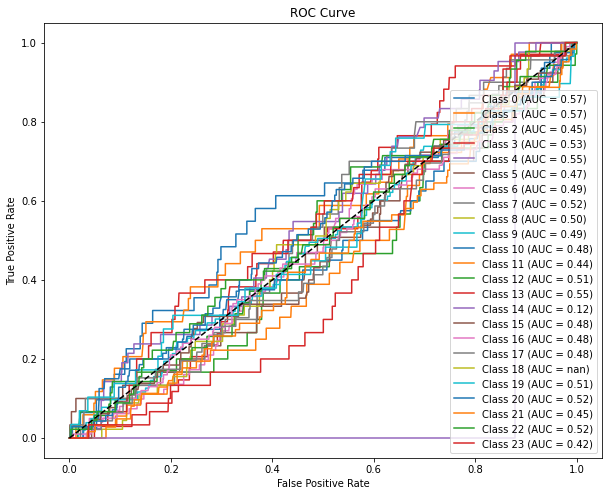

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

y_true = test_data.classes 
y_pred_probs = model_10.predict(test_data)

y_true_onehot = to_categorical(y_true, num_classes=len(test_data.class_indices))

plt.figure(figsize=(10, 8))
for i in range(len(test_data.class_indices)):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
